In [1]:
import pandas as pd


In [2]:
weather = pd.read_csv("local_weather.csv" , index_col="DATE")


In [3]:
weather

,STATION,NAME,DAPR,DWPR,MDPR,PRCP
DATE,,,,,,
1973-10-01,ASN00035221,"LUCKNOW, AS",NaN,NaN,NaN,0.0
1973-10-02,ASN00035221,"LUCKNOW, AS",NaN,NaN,NaN,0.0
1973-10-03,ASN00035221,"LUCKNOW, AS",NaN,NaN,NaN,0.0
1973-10-04,ASN00035221,"LUCKNOW, AS",NaN,NaN,NaN,0.0
1973-10-05,ASN00035221,"LUCKNOW, AS",NaN,NaN,NaN,0.0
...,...,...,...,...,...,...
2022-05-27,ASN00035221,"LUCKNOW, AS",NaN,NaN,NaN,0.0
2022-05-28,ASN00035221,"LUCKNOW, AS",NaN,NaN,NaN,0.0
2022-05-29,ASN00035221,"LUCKNOW, AS",NaN,NaN,NaN,0.0


In [4]:
weather.loc["1960-01-01":"1960-01-31",:]

,STATION,NAME,DAPR,DWPR,MDPR,PRCP
DATE,,,,,,


In [5]:
weather.apply(pd.isnull).sum()/weather.shape[0]

STATION    0.000000
NAME       0.000000
DAPR       0.999374
DWPR       0.999374
MDPR       0.999374
PRCP       0.000626
dtype: float64

In [8]:
core_weather = weather[["PRCP"]].copy()

In [9]:
core_weather.columns = ["precip"]

In [10]:
core_weather

,precip
DATE,
1973-10-01,0.0
1973-10-02,0.0
1973-10-03,0.0
1973-10-04,0.0
1973-10-05,0.0
...,...
2022-05-27,0.0
2022-05-28,0.0
2022-05-29,0.0


In [11]:
core_weather.apply(pd.isnull).sum()/weather.shape[0]

precip    0.000626
dtype: float64

In [12]:
core_weather["precip"].value_counts()

precip
0.00    15696
0.08       94
0.20       92
0.16       91
0.24       77
        ...  
2.48        1
5.43        1
3.07        1
3.27        1
3.66        1
Name: count, Length: 203, dtype: int64

In [13]:
core_weather[pd.isnull(core_weather["precip"])]

,precip
DATE,
1998-04-15,NaN
1998-08-07,NaN
1999-04-06,NaN
2001-10-27,NaN
2003-02-12,NaN
2003-02-26,NaN
2003-08-25,NaN
2004-11-06,NaN
2004-12-27,NaN


In [14]:
core_weather.loc["1983-10-20":"1983-12-29",:]


,precip
DATE,
1983-10-20,0.92
1983-10-21,0.00
1983-10-22,0.00
1983-10-23,0.00
1983-10-24,0.00
...,...
1983-12-25,0.00
1983-12-26,0.00
1983-12-27,0.00


In [15]:
core_weather["precip"].value_counts()


precip
0.00    15696
0.08       94
0.20       92
0.16       91
0.24       77
        ...  
2.48        1
5.43        1
3.07        1
3.27        1
3.66        1
Name: count, Length: 203, dtype: int64

In [18]:
core_weather["precip"]= core_weather["precip"].fillna(0)


In [19]:
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]


precip    0.0
dtype: float64

In [20]:
core_weather.dtypes


precip    float64
dtype: object

In [21]:
core_weather.index


Index(['1973-10-01', '1973-10-02', '1973-10-03', '1973-10-04', '1973-10-05',
       '1973-10-06', '1973-10-07', '1973-10-08', '1973-10-09', '1973-10-10',
       ...
       '2022-05-22', '2022-05-23', '2022-05-24', '2022-05-25', '2022-05-26',
       '2022-05-27', '2022-05-28', '2022-05-29', '2022-05-30', '2022-05-31'],
      dtype='object', name='DATE', length=17566)

In [22]:
core_weather.index= pd.to_datetime(core_weather.index)


In [23]:
core_weather.index.year


Index([1973, 1973, 1973, 1973, 1973, 1973, 1973, 1973, 1973, 1973,
       ...
       2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022],
      dtype='int32', name='DATE', length=17566)

In [24]:
core_weather.index.month


Index([10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       ...
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5],
      dtype='int32', name='DATE', length=17566)

In [25]:
core_weather.apply(lambda x: (x==9999).sum())


precip    0
dtype: int64

In [26]:
core_weather.index.year.value_counts().sort_index()


DATE
1973     92
1974    365
1975    365
1976    366
1977    365
1978    365
1979    365
1980    366
1981    365
1982    365
1983    365
1984    366
1985    365
1986    365
1987    365
1988    366
1989    334
1990    365
1991    365
1992    366
1993    365
1994    365
1995    365
1996    366
1997    365
1998    362
1999    362
2000    366
2001    364
2002    365
2003    361
2004    329
2005    364
2006    364
2007    364
2008    366
2009    365
2010    362
2011    365
2012    335
2013    365
2014    334
2015    334
2016    366
2017    365
2018    365
2019    365
2020    366
2021    334
2022    151
Name: count, dtype: int64

<Axes: xlabel='DATE'>

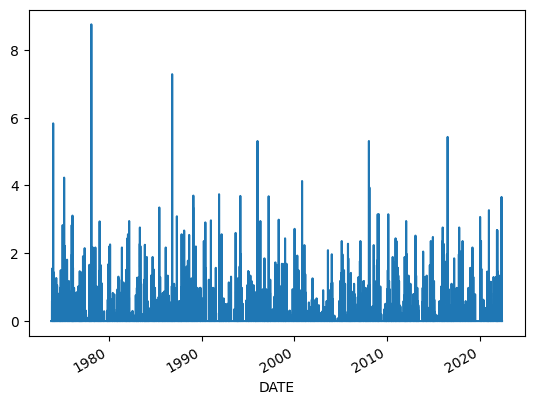

In [27]:
core_weather["precip"].plot()


In [28]:
core_weather.groupby(core_weather.index.year).sum()


,precip
DATE,
1973,14.30
1974,32.16
1975,40.27
1976,27.89
1977,19.75
1978,43.16
1979,17.61
1980,21.51
1981,28.06


In [39]:
core_weather["target"] = core_weather.shift(-1)["precip"]

In [40]:
core_weather= core_weather.iloc[:-1,:].copy()


In [41]:
core_weather


,precip,target
DATE,,
1973-10-01,0.0,0.0
1973-10-02,0.0,0.0
1973-10-03,0.0,0.0
1973-10-04,0.0,0.0
1973-10-05,0.0,0.0
...,...,...
2022-05-25,0.0,0.0
2022-05-26,0.0,0.0
2022-05-27,0.0,0.0


In [42]:
from sklearn.linear_model import Ridge 
reg= Ridge(alpha=.1)

In [43]:
predictors = ["precip"]

In [44]:
train = core_weather.loc[:"2020-12-31"]

In [45]:
test= core_weather.loc["2021-01-01":]

In [46]:
reg.fit(train[predictors], train["target"])

Ridge(alpha=0.1)

In [61]:
predictions= reg.predict(test[predictors])

In [62]:
from sklearn.metrics import mean_absolute_error

In [63]:
mean_absolute_error(test["target"], predictions)

np.float64(0.1200700724051724)

In [66]:
combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
combined.columns=["actual","predictions"]

In [67]:
combined

,actual,predictions
DATE,,
2021-01-01,0.00,0.049172
2021-01-02,0.00,0.049172
2021-01-03,0.00,0.049172
2021-01-04,0.00,0.049172
2021-01-05,0.08,0.049172
...,...,...
2022-05-25,0.00,0.049172
2022-05-26,0.00,0.049172
2022-05-27,0.00,0.049172


<Axes: xlabel='DATE'>

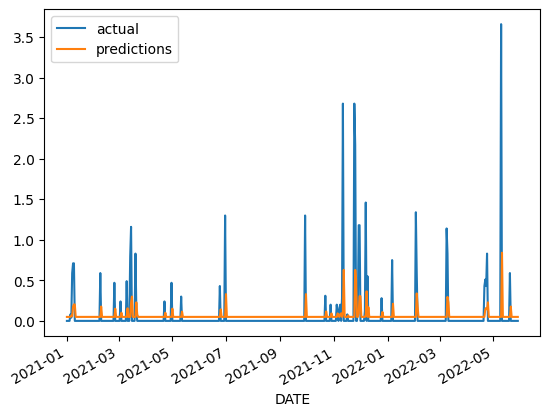

In [68]:
combined.plot()

In [69]:
reg.coef_

array([0.21630092])

In [80]:
def create_predictions(predictors, core_weather, reg):
    train = core_weather.loc[:"2021-12-31"]
    test= core_weather.loc["2021-01-01":]
    reg.fit(train[predictors], train["target"])
    predictions= reg.predict(test[predictors])
    error= mean_absolute_error(test["target"], predictions)
    combined=  pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns=["actual","predictions"]
    return error, combined

In [81]:
core_weather["month_max"]= core_weather["precip"].rolling(30).mean()

In [82]:
core_weather

,precip,target,month_max,month_day_max,max_min
DATE,,,,,
1973-10-31,0.0,0.0,NaN,NaN,NaN
1973-11-01,0.0,0.1,NaN,NaN,NaN
1973-11-02,0.1,0.3,NaN,0.033333,3.00
1973-11-03,0.3,0.6,NaN,0.044444,6.75
1973-11-04,0.6,0.2,NaN,0.055556,10.80
...,...,...,...,...,...
2022-05-25,0.0,0.0,0.141667,inf,0.00
2022-05-26,0.0,0.0,0.141667,inf,0.00
2022-05-27,0.0,0.0,0.141667,inf,0.00


In [83]:
core_weather["month_day_max"]= core_weather["month_max"]/core_weather["precip"]

In [84]:
core_weather["max_min"]= core_weather["precip"]/core_weather["month_day_max"]

In [85]:
predictors= ["precip","month_max","month_day_max","max_min"]

In [86]:
core_weather= core_weather.iloc[30:,:].copy()

<Axes: xlabel='DATE'>

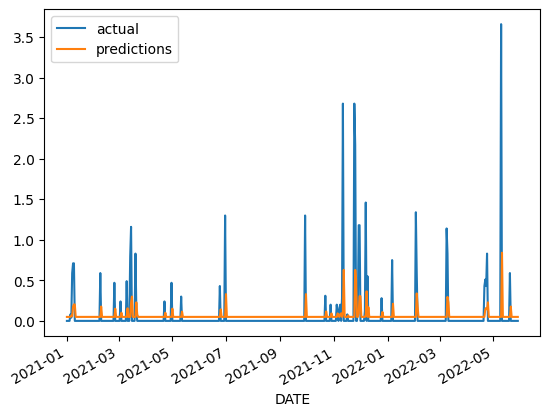

In [90]:
combined.plot()

In [97]:
core_weather

,precip,target,month_max,month_day_max,max_min
DATE,,,,,
1973-11-30,0.0,0.0,0.150000,inf,0.0
1973-12-01,0.0,0.0,0.150000,inf,0.0
1973-12-02,0.0,0.0,0.146667,inf,0.0
1973-12-03,0.0,0.0,0.136667,inf,0.0
1973-12-04,0.0,0.3,0.116667,inf,0.0
...,...,...,...,...,...
2022-05-25,0.0,0.0,0.141667,inf,0.0
2022-05-26,0.0,0.0,0.141667,inf,0.0
2022-05-27,0.0,0.0,0.141667,inf,0.0


In [100]:
core_weather.corr()["target"]

precip           0.216410
target           1.000000
month_max        0.099998
month_day_max   -0.027617
max_min          0.172645
Name: target, dtype: float64

In [101]:
combined["diff"]= (combined["actual"] - combined["predictions"]).abs()

In [102]:
combined.sort_values("diff", ascending=False).head()

,actual,predictions,diff
DATE,,,
2022-05-10,3.66,0.049172,3.610828
2021-11-24,2.68,0.049172,2.630828
2021-11-11,2.68,0.109737,2.570263
2021-11-25,2.17,0.628859,1.541141
2021-12-07,1.46,0.075129,1.384871
